# PCM audio quality test

Date: 2023/10/06

In [165]:
import numpy as np
import serial
from scipy.io import wavfile
import traceback
import matplotlib.pyplot as plt

PORT = 'COM6'
BAUDRATE = 460800
RAW = b'1'
ENABLE_CONTINOUS_OUTPUT = b'c'
DISABLE_CONTINOUS_OUTPUT = b'C'
ENABLE_PCM_BIT_SHIFT = b'e'
Fs = int(80000000 / 64 / 64)
NUM_SAMPLES = 512
NUM_REPEAT = 100

Fs

19531

In [166]:
b16_to_int = lambda msb, lsb, signed: int.from_bytes([msb, lsb], byteorder='big', signed=signed)

In [167]:
try:
    ser.close()
except:
    print('Already closed')
    
ser = serial.Serial('COM6', BAUDRATE)
data = []

try:
    ser.write(ENABLE_CONTINOUS_OUTPUT)
    ser.write(ENABLE_PCM_BIT_SHIFT)
    ser.write(RAW)
    rx = ser.read(NUM_SAMPLES * 2 * NUM_REPEAT)
    rx = zip(rx[0::2], rx[1::2])
    for msb, lsb in rx:
        d = b16_to_int(msb, lsb, True)
        data.append(d)
    ser.write(DISABLE_CONTINOUS_OUTPUT)
    ser.close()
except:
    traceback.print_exc()
    ser.close()
    
data = np.array(data, dtype=np.int16)

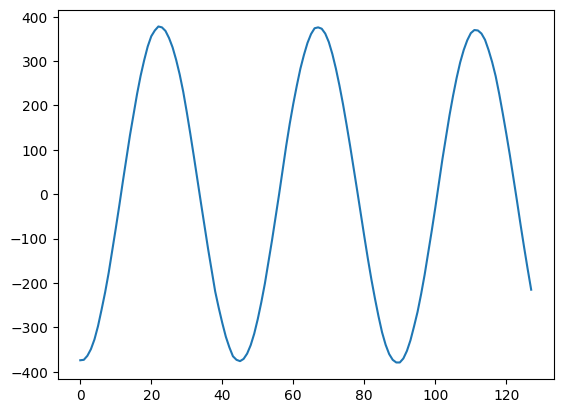

In [168]:
plt.plot(data[:128])

In [169]:
wavfile.write('pcm.wav', Fs, data)